### NAME: ATHARVA RANADE
#### GITHUB Username: atharvaranade4

#### Assignment 06
#### 11-19-2020

# Assignment 6: Urban Street Networks and Interactive Web Maps

**NOTE: THIS ASSIGNMENT IS OPTIONAL**. You must complete one out of homeworks #4, #5, and #6.

**Due date: Thursday, 11/19 by the start of class**

The notebook should be submitted to your own private repository on GitHub, which can be created using the following link:

https://classroom.github.com/a/TJWiPaxP

#### Part 1: Visualizing crash data in Philadelphia

In this section, you will use `osmnx` to analyze the crash incidence in Center City. 

#### Part 2: Interactive web maps in Folium

In this section, you'll visualize a geospatial data set, queried using an API, using Folium in Python.

## Part 1: Visualizing crash data in Philadelphia

### 1.1 Load the geometry for the region being analyzed

We'll analyze crashes in the "Central" planning district in Philadelphia, a rough approximation for Center City. [Planning districts](https://www.opendataphilly.org/dataset/planning-districts) can be loaded from Open Data Philly. Read the data into a GeoDataFrame using the following link:

http://data.phl.opendata.arcgis.com/datasets/0960ea0f38f44146bb562f2b212075aa_0.geojson

Select the "Central" district and extract the geometry polygon for only this district. After this part, you should have a polygon variable of type `shapely.geometry.polygon.Polygon`.

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import altair as alt
%matplotlib inline

In [3]:
import osmnx as ox

In [4]:
url = "http://data.phl.opendata.arcgis.com/datasets/0960ea0f38f44146bb562f2b212075aa_0.geojson"
df = gpd.read_file(url)

In [5]:
df.head()

,OBJECTID_1,OBJECTID,DIST_NAME,ABBREV,Shape__Area,Shape__Length,PlanningDist,DaytimePop,geometry
0,1,14,River Wards,RW,2.107270e+08,66931.595020,None,None,"POLYGON ((-75.09798 40.00496, -75.09687 40.005..."
1,2,3,North Delaware,NDEL,2.700915e+08,89213.074378,None,None,"POLYGON ((-74.98159 40.05363, -74.98139 40.053..."
2,3,0,Lower Far Northeast,LFNE,3.068529e+08,92703.285159,None,None,"POLYGON ((-74.96443 40.11728, -74.96434 40.117..."
3,4,9,Central,CTR,1.782880e+08,71405.143450,None,None,"POLYGON ((-75.14791 39.96733, -75.14715 39.967..."
4,5,10,University Southwest,USW,1.296468e+08,65267.676141,None,None,"POLYGON ((-75.18742 39.96338, -75.18644 39.963..."


In [6]:
#Trim to Central

sel = df["DIST_NAME"].isin(['Central'])
central = df.loc[sel]

In [7]:
central.head()

,OBJECTID_1,OBJECTID,DIST_NAME,ABBREV,Shape__Area,Shape__Length,PlanningDist,DaytimePop,geometry
3,4,9,Central,CTR,1.782880e+08,71405.14345,None,None,"POLYGON ((-75.14791 39.96733, -75.14715 39.967..."


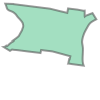

In [8]:
central.geometry.unary_union

In [9]:
type(central.geometry.unary_union)

shapely.geometry.polygon.Polygon

In [10]:
central.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 1.2 Get the street network graph

Use OSMnx to create a network graph (of type 'drive') from your polygon boundary in 1.1.

In [9]:
G_central = ox.graph_from_polygon(central.geometry.unary_union, network_type='drive')

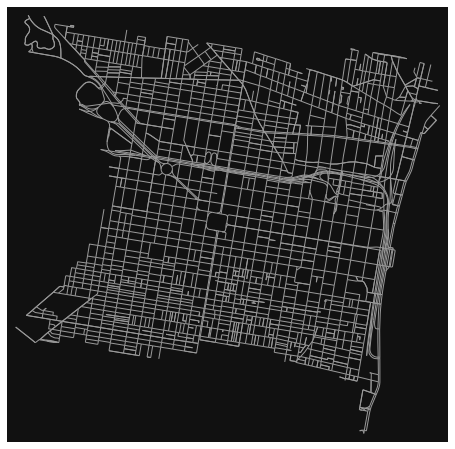

In [10]:
ox.plot_graph(ox.project_graph(G_central), node_size=0);

### 1.3 Convert your network graph edges to a GeoDataFrame

Use OSMnx to create a GeoDataFrame of the network edges in the graph object from part 1.2. The GeoDataFrame should contain the edges but not the nodes from the network.

In [11]:
central_edges = ox.graph_to_gdfs(G_central, 
                                edges=True, 
                                nodes=False)

In [12]:
central_edges.head()

,osmid,oneway,name,highway,length,geometry,lanes,maxspeed,tunnel,bridge,ref,service,access,junction,u,v,key
0,132508434,True,Bainbridge Street,residential,44.137,"LINESTRING (-75.17104 39.94345, -75.17053 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109727439,109911666,0
1,12109011,True,South Colorado Street,residential,109.484,"LINESTRING (-75.17125 39.94248, -75.17120 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109727448,109727439,0
2,12159387,True,Fitzwater Street,residential,91.353,"LINESTRING (-75.17125 39.94248, -75.17137 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109727448,110034229,0
3,193364514,True,Carpenter Street,residential,53.208,"LINESTRING (-75.17196 39.93973, -75.17134 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109727507,110024052,0
4,672312336,True,Brown Street,residential,58.270,"LINESTRING (-75.17317 39.96951, -75.17250 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109728761,110274344,0


In [13]:
central_edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

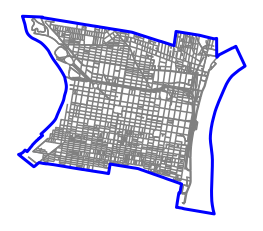

In [14]:
# plot it like any old GeoDataFrame
ax = central_edges.to_crs(epsg=3857).plot(color='gray')

# add the neighborhood boundaries
boundary = gpd.GeoSeries([central.geometry.unary_union], crs='EPSG:4326')
boundary.to_crs(epsg=3857).plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=3, zorder=2)

ax.set_axis_off()

### 1.4 Load PennDOT crash data

Data for 2019 crashes (of all types) is available at the following path:

`./data/CRASH_2019_Philadelphia.csv`

The data was downloaded for Philadelphia County [from here](https://crashinfo.penndot.gov/PCIT/welcome.html).

In [15]:
crashdata = pd.read_csv("./data/CRASH_2019_Philadelphia.csv")

In [16]:
crashdata.head()

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2
0,2035.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1,1855.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,542.0,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,408.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,850.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [17]:
crashdata['DEC_LAT']

0        39.9586
1        39.9400
2        40.0346
3        40.0236
4        40.0640
          ...   
11113    39.9905
11114    39.9666
11115    39.9860
11116    39.9761
11117    39.9826
Name: DEC_LAT, Length: 11118, dtype: float64

### 1.5 Convert the crash data to a GeoDataFrame

You will need to use the `DEC_LAT` and `DEC_LONG` columns for latitude and longitude.

The full data dictionary for the data is [available here](http://pennshare.maps.arcgis.com/sharing/rest/content/items/ffe20c6c3c594389b275c6772a281bcd/data)

In [18]:
# Create the Point() objects
crashdata['points'] = gpd.points_from_xy(crashdata['DEC_LONG'],crashdata['DEC_LAT'] )


In [19]:
# Create the GeoDataFrame
# Convert geodataframe to #4326
crashdata_g = gpd.GeoDataFrame(crashdata, geometry='points', crs="EPSG:4326")
crashdata_3857  = crashdata_g.to_crs(epsg=3857)
crashdata_3857

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,points
0,2035.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,POINT (-8367696.880 4859927.967)
1,1855.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-8370780.430 4857227.070)
2,542.0,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-8373051.347 4870971.532)
3,408.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,POINT (-8366550.289 4869372.360)
4,850.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,POINT (-8355596.451 4875246.948)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,1001.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,POINT (-8364602.198 4864561.861)
11114,2353.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,POINT (-8363466.739 4861089.869)
11115,1600.0,1,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,POINT (-8372828.708 4863908.046)
11116,1825.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,POINT (-8366795.192 4862469.804)


<AxesSubplot:>

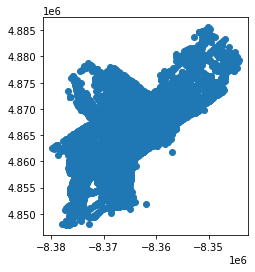

In [20]:
#CHECK
crashdata_3857.plot()

### 1.6 Trim the crash data to Center City

1. Get the boundary of the edges data frame (from part 1.3). Accessing the `.geometry.unary_union.convex_hull` property will give you a nice outer boundary region.
1. Trim the crashes using the `within()` function of the crash GeoDataFrame to find which crashes are within the boundary.

There should be about 1,600 crashes within the Central district.

In [21]:
#CHECK
crashdata_3857.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
#Convert central df to 3857 projection

central_3857 = central.to_crs(epsg=3857)

In [23]:
central_3857

,OBJECTID_1,OBJECTID,DIST_NAME,ABBREV,Shape__Area,Shape__Length,PlanningDist,DaytimePop,geometry
3,4,9,Central,CTR,1.782880e+08,71405.14345,None,None,"POLYGON ((-8365427.328 4861196.536, -8365342.4..."


In [24]:
central_convex = central_3857.geometry.unary_union.convex_hull
type(central_convex)

shapely.geometry.polygon.Polygon

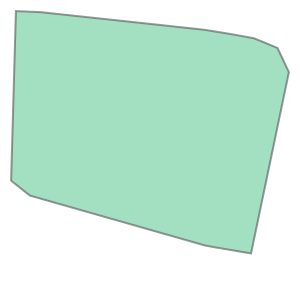

In [25]:
central_3857.geometry.unary_union.convex_hull

In [26]:
central_crashes = gpd.GeoSeries.within(crashdata_3857, central_convex)
central_crashes

0         True
1        False
2        False
3        False
4        False
         ...  
11113    False
11114     True
11115    False
11116    False
11117    False
Length: 11118, dtype: bool

In [27]:
central_crashes.sum()

1699

In [28]:
#Create a trimmed Dataframe

df_trimmed = crashdata_g.loc[central_crashes]
df_trimmed

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,points
0,2035.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,POINT (-75.16830 39.95860)
7,938.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,POINT (-75.14650 39.95750)
8,1800.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,POINT (-75.13300 39.96720)
18,1325.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,POINT (-75.16880 39.95150)
19,2257.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,POINT (-75.14890 39.95730)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,1420.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,POINT (-75.16350 39.94920)
11083,1314.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,POINT (-75.15650 39.95890)
11085,9999.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,POINT (-75.16420 39.94820)
11109,1505.0,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,POINT (-75.15450 39.95430)


In [29]:
df_trimmed.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 1.7 Find the nearest edge for each crash

See: `ox.get_nearest_edges()`. It takes three arguments:

- the network graph
- the longitude of your crash data (the `x` attribute of the `geometry` column)
- the latitude of your crash data (the `y` attribute of the `geometry` column)

You will get a numpy array with 3 columns that represent `(u, v, key)` where each `u` and `v` are the node IDs that the edge links together. We will ignore the `key` value for our analysis.

**Note: this operation is slow and can take about 5 to 10 minutes, based on your computer speed.**

In [30]:
import networkx as nx

In [31]:
ox.basic_stats(G_central)

{'n': 2028,
 'm': 3943,
 'k_avg': 3.888560157790927,
 'intersection_count': 1979,
 'streets_per_node_avg': 3.443293885601578,
 'streets_per_node_counts': {0: 0, 1: 49, 2: 5, 3: 996, 4: 958, 5: 16, 6: 4},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.024161735700197237,
  2: 0.002465483234714004,
  3: 0.4911242603550296,
  4: 0.4723865877712032,
  5: 0.007889546351084813,
  6: 0.0019723865877712033},
 'edge_length_total': 354302.18800000026,
 'edge_length_avg': 89.85599492772008,
 'street_length_total': 307262.06000000064,
 'street_length_avg': 90.29152512488999,
 'street_segments_count': 3403,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0182310022980154,
 'self_loop_proportion': 0.001014455997971088,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [32]:
df_trimmed.geometry.x.head()

0    -75.1683
7    -75.1465
8    -75.1330
18   -75.1688
19   -75.1489
dtype: float64

In [33]:
df_trimmed.geometry.y.head()

0     39.9586
7     39.9575
8     39.9672
18    39.9515
19    39.9573
dtype: float64

In [34]:
nearest_edge = ox.get_nearest_edges(G_central,
                                    df_trimmed.geometry.x, 
                                    df_trimmed.geometry.y )

In [35]:
#Numpy array
nearest_edge

array([[1589900925,  109791270,          0],
       [ 109767943,  110232451,          0],
       [ 110522533,  110564956,          0],
       ...,
       [ 110311510,  110311460,          0],
       [ 110417392,  110530981,          0],
       [ 110522533,  110564956,          0]], dtype=int64)

### 1.8 Calculate the total number of crashes per street

1. Make a DataFrame from your data from part 1.7 with three columns, `u`, `v`, and `key` (we will only use the `u` and `v` columns)
1. Group by `u` and `v` and calculate the size
1. Reset the index and name your `size()` column as `crash_count`

After this step you should have a DataFrame with three columns: `u`, `v`, and `crash_count`.

In [36]:
#dataframe from numpy array

# creating a list of column names 
column_values = ['u', 'v', 'key'] 
  
# creating the dataframe 
df_numpy = pd.DataFrame(data = nearest_edge,  
                  columns = column_values) 

In [37]:
df_numpy

,u,v,key
0,1589900925,109791270,0
1,109767943,110232451,0
2,110522533,110564956,0
3,109849614,109849604,0
4,109811674,109811645,0
...,...,...,...
1694,3426140639,109988492,0
1695,765755081,110225620,0
1696,110311510,110311460,0
1697,110417392,110530981,0


In [38]:
grouped_df = df_numpy.groupby(['u', 'v']).count()
grouped_df = grouped_df.rename(columns={'key': 'crash_count'})
grouped_df

crash_count
u          v                      
109729330  110216446             2
109729474  3425014859            1
109729699  109729709             1
           109811674             1
109729709  109729731             1
...                            ...
7098423740 634779336             3
7738634760 7738634754            1
7738634767 1479201368            3
7738709997 1479201367            3
           7738710010            1

[631 rows x 1 columns]

### 1.9 Merge your edges GeoDataFrame and crash count DataFrame

You can use pandas to merge them on the `u` and `v` columns. This will associate the total crash count with each edge in the street network. 

**Tips:** 
   - Use a `left` merge where the first argument of the merge is the edges GeoDataFrame. This ensures no edges are removed during the merge.
   - Use the `fillna(0)` function to fill in missing crash count values with zero.

In [39]:
merged = pd.merge(central_edges, grouped_df, how='left', on=['u', 'v'])

In [40]:
merged_filled = merged.fillna(0)
merged_filled.head()

,osmid,oneway,name,highway,length,geometry,lanes,maxspeed,tunnel,bridge,ref,service,access,junction,u,v,key,crash_count
0,132508434,True,Bainbridge Street,residential,44.137,"LINESTRING (-75.17104 39.94345, -75.17053 39.9...",0,0,0,0,0,0,0,0,109727439,109911666,0,0.0
1,12109011,True,South Colorado Street,residential,109.484,"LINESTRING (-75.17125 39.94248, -75.17120 39.9...",0,0,0,0,0,0,0,0,109727448,109727439,0,0.0
2,12159387,True,Fitzwater Street,residential,91.353,"LINESTRING (-75.17125 39.94248, -75.17137 39.9...",0,0,0,0,0,0,0,0,109727448,110034229,0,0.0
3,193364514,True,Carpenter Street,residential,53.208,"LINESTRING (-75.17196 39.93973, -75.17134 39.9...",0,0,0,0,0,0,0,0,109727507,110024052,0,0.0
4,672312336,True,Brown Street,residential,58.270,"LINESTRING (-75.17317 39.96951, -75.17250 39.9...",0,0,0,0,0,0,0,0,109728761,110274344,0,0.0


In [41]:
merged_filled['crash_count'].unique()

array([ 0.,  2.,  1., 28.,  3., 24.,  6.,  8., 14., 18., 67., 29.,  4.,
        5., 26., 10.,  7., 23., 13.,  9., 16., 21., 45., 12., 11., 17.,
       31., 27.])

In [42]:
valid = merged_filled['crash_count'] > 0
merged_filled = merged_filled.loc[valid]
merged_filled

,osmid,oneway,name,highway,length,geometry,lanes,maxspeed,tunnel,bridge,ref,service,access,junction,u,v,key,crash_count
7,12203956,True,North New Street,tertiary,74.447,"LINESTRING (-75.14759 39.95569, -75.14761 39.9...",0,0,0,0,0,0,0,0,109729330,110216446,0,2.0
14,62154356,True,Arch Street,secondary,125.024,"LINESTRING (-75.14848 39.95258, -75.14859 39.9...",2,25 mph,0,0,0,0,0,0,109729474,3425014859,0,1.0
25,"[424804073, 121643778]",True,Callowhill Street,trunk,136.219,"LINESTRING (-75.14724 39.95781, -75.14739 39.9...",5,35 mph,0,0,0,0,0,0,109729699,109811674,0,1.0
26,"[633770802, 41959235]",True,North 5th Street,secondary,88.044,"LINESTRING (-75.14724 39.95781, -75.14722 39.9...",0,0,0,0,0,0,0,0,109729699,109729709,0,1.0
29,41959235,True,North 5th Street,secondary,282.978,"LINESTRING (-75.14711 39.95859, -75.14709 39.9...",0,0,0,0,0,0,0,0,109729709,109729731,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,859508259,True,North Delaware Avenue,primary,13.032,"LINESTRING (-75.13426 39.96444, -75.13416 39.9...",0,0,0,0,0,0,0,0,7098423740,634779336,0,3.0
3916,829064513,True,West Girard Avenue,secondary,73.298,"LINESTRING (-75.14238 39.96982, -75.14163 39.9...",0,0,0,0,0,0,0,0,7738634760,7738634754,0,1.0
3921,829064518,True,West Girard Avenue,secondary,71.722,"LINESTRING (-75.14587 39.97025, -75.14513 39.9...",0,0,0,0,0,0,0,0,7738634767,1479201368,0,3.0
3931,857069767,False,West Girard Avenue,secondary,48.146,"LINESTRING (-75.13911 39.96943, -75.13856 39.9...",0,0,0,0,0,0,0,0,7738709997,7738710010,0,1.0


### 1.10 Calculate a "Crash Index"

Let's calculate a "crash index" that provides a normalized measure of the crash frequency per street. To do this, we'll need to:

1. Calculate the total crash count divided by the street length, using the `length` column
1. Perform a log transformation of the crash/length variable — use numpy's `log10()` function
1. Normalize the index from 0 to 1 (see the lecture notes for an example of this transformation)

**Note: since the crash index involves a log transformation, you should only calculate the index for streets where the crash count is greater than zero**.

After this step, you should have a new column in the data frame from 1.9 that includes a column called part 1.9.

In [43]:
index = merged_filled['crash_count']/merged_filled['length']

In [44]:
index = np.log10(index.loc[index>0])

In [45]:
merged_filled['logtransformed'] = index

In [46]:
merged_filled.head()

,osmid,oneway,name,highway,length,geometry,lanes,maxspeed,tunnel,bridge,ref,service,access,junction,u,v,key,crash_count,logtransformed
7,12203956,True,North New Street,tertiary,74.447,"LINESTRING (-75.14759 39.95569, -75.14761 39.9...",0,0,0,0,0,0,0,0,109729330,110216446,0,2.0,-1.570817
14,62154356,True,Arch Street,secondary,125.024,"LINESTRING (-75.14848 39.95258, -75.14859 39.9...",2,25 mph,0,0,0,0,0,0,109729474,3425014859,0,1.0,-2.096993
25,"[424804073, 121643778]",True,Callowhill Street,trunk,136.219,"LINESTRING (-75.14724 39.95781, -75.14739 39.9...",5,35 mph,0,0,0,0,0,0,109729699,109811674,0,1.0,-2.134238
26,"[633770802, 41959235]",True,North 5th Street,secondary,88.044,"LINESTRING (-75.14724 39.95781, -75.14722 39.9...",0,0,0,0,0,0,0,0,109729699,109729709,0,1.0,-1.944700
29,41959235,True,North 5th Street,secondary,282.978,"LINESTRING (-75.14711 39.95859, -75.14709 39.9...",0,0,0,0,0,0,0,0,109729709,109729731,0,1.0,-2.451753


In [47]:
#normalize

#Minimum
min_val = merged_filled['logtransformed'].min()

#Maximum
max_val = merged_filled['logtransformed'].max()

#Calculate a normalized column
normalized = (merged_filled['logtransformed'] - min_val) / (max_val - min_val)

#Add to the dataframe
merged_filled['crash_index'] = normalized

In [48]:
merged_filled.head()

,osmid,oneway,name,highway,length,geometry,lanes,maxspeed,tunnel,bridge,ref,service,access,junction,u,v,key,crash_count,logtransformed,crash_index
7,12203956,True,North New Street,tertiary,74.447,"LINESTRING (-75.14759 39.95569, -75.14761 39.9...",0,0,0,0,0,0,0,0,109729330,110216446,0,2.0,-1.570817,0.362940
14,62154356,True,Arch Street,secondary,125.024,"LINESTRING (-75.14848 39.95258, -75.14859 39.9...",2,25 mph,0,0,0,0,0,0,109729474,3425014859,0,1.0,-2.096993,0.203596
25,"[424804073, 121643778]",True,Callowhill Street,trunk,136.219,"LINESTRING (-75.14724 39.95781, -75.14739 39.9...",5,35 mph,0,0,0,0,0,0,109729699,109811674,0,1.0,-2.134238,0.192317
26,"[633770802, 41959235]",True,North 5th Street,secondary,88.044,"LINESTRING (-75.14724 39.95781, -75.14722 39.9...",0,0,0,0,0,0,0,0,109729699,109729709,0,1.0,-1.944700,0.249716
29,41959235,True,North 5th Street,secondary,282.978,"LINESTRING (-75.14711 39.95859, -75.14709 39.9...",0,0,0,0,0,0,0,0,109729709,109729731,0,1.0,-2.451753,0.096162


### 1.11 Plot a histogram of the crash index values

Use matplotlib's `hist()` function to plot the crash index values from the previous step.

You should see that the index values are Gaussian-distributed, providing justification for why we log-transformed!

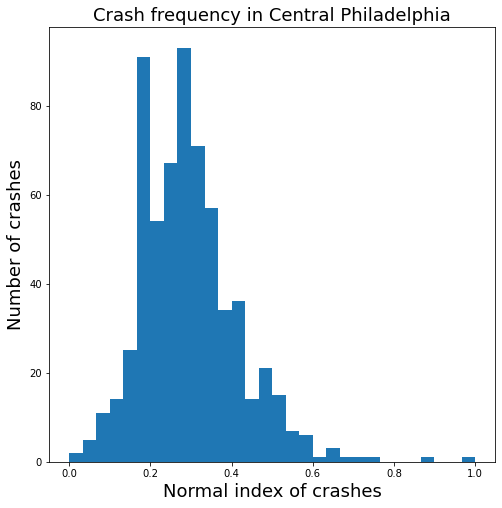

In [49]:
# Initialize
fig, ax = plt.subplots(figsize=(8,8))

# Plot a quick histogram 
ax.hist(merged_filled['crash_index'], bins='auto')

# Format
ax.set_xlabel("Normal index of crashes", fontsize=18)
ax.set_ylabel("Number of crashes", fontsize=18);
ax.set_title("Crash frequency in Central Philadelphia", fontsize=18);

### 1.12 Plot the street networks, colored by the crash index

You can use GeoPandas to make the plot, coloring the streets by the crash index column.

**Tip:** if you use the viridis color map, try setting the facecolor of the axes as black for better constrast of the colors.

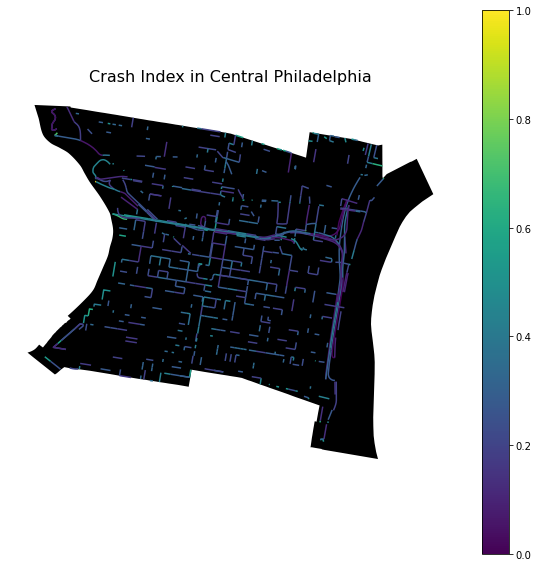

In [50]:
fig, ax = plt.subplots(figsize=(10,10))

# Plot the city limits
central.plot(ax=ax, edgecolor='none', facecolor='black', linewidth=4)


# Plot the choropleth
merged_filled.plot(ax=ax, column='crash_index', legend=True)

# Format
ax.set_title("Crash Index in Central Philadelphia", fontsize=16)
ax.set_axis_off()

### 1.13 An interactive map of the crash index

In this part, we'll use Folium to make an interactive version of the map from the previous section. In this part, you will need to:

1. Initialize a Folium map centered on Philadelphia. The "Cartodb dark_matter" will be best if you want to use the viridis color map.
1. Add the street edges polygons to the map using the `Folium.GeoJson()` function.
1. Use a style function that applies a color to the edge geometries based on the value of the "crash index" column. 
    - See the crash index is defined from 0 to 1, you can pass this directly to a color map object, as in lecture.
    - You will need to convert the RGB color returned by the color map to a hex string
    - You can also set the "weight" attribute to change the width of the streets.
1. Add a GeoJsonTooltip object that includes the street name and crash index value so you can quickly identify which streets have the highest index values.

**Note:** if the Folium map is not rendering in the notebook, try removing unused columns — you should really only need the "geometry", "crash_index", and "name" columns.

In [51]:
import folium

In [52]:
import matplotlib.colors as mcolors

In [53]:
#Define Style Function

# Use a red-purple colorbrewer color scheme
cmap = plt.get_cmap('viridis')

In [54]:
# The minimum value of the color map as an RGB tuple
cmap(0)

(0.267004, 0.004874, 0.329415, 1.0)

In [55]:
# The minimum value of the color map as a hex string
mcolors.rgb2hex(cmap(0.0))

'#440154'

In [56]:
# The maximum value of the color map as a hex string
mcolors.rgb2hex(cmap(1.0))

'#fde725'

In [57]:
def get_style(feature):
    """
    Given an input GeoJSON feature, return a style dict.
    
    Notes
    -----
    The color in the style dict is determined by the 
    "percent_no_internet_normalized" column in the 
    input "feature".
    """
    # Get the data value from the feature
    value = feature['properties']['crash_index']
    
    # Evaluate the color map
    # NOTE: value must between 0 and 1
    rgb_color = cmap(value) # this is an RGB tuple
    
    # Convert to hex string
    color = mcolors.rgb2hex(rgb_color)
    
    # Return the style dictionary
    return {'weight': 4, 'color': color, 'fillColor': color, "fillOpacity": 1}

In [58]:
def get_highlighted_style(feature):
    """
    Return a style dict to use when the user highlights a 
    feature with the mouse.
    """
    
    return {"weight": 3, "color": "black"}

In [59]:
#TRim the Geojson

needed_cols = ['name', 'geometry', 'crash_index']
merged_json = merged_filled[needed_cols]
merged_json.fillna(0)

,name,geometry,crash_index
7,North New Street,"LINESTRING (-75.14759 39.95569, -75.14761 39.9...",0.362940
14,Arch Street,"LINESTRING (-75.14848 39.95258, -75.14859 39.9...",0.203596
25,Callowhill Street,"LINESTRING (-75.14724 39.95781, -75.14739 39.9...",0.192317
26,North 5th Street,"LINESTRING (-75.14724 39.95781, -75.14722 39.9...",0.249716
29,North 5th Street,"LINESTRING (-75.14711 39.95859, -75.14709 39.9...",0.096162
...,...,...,...
3907,North Delaware Avenue,"LINESTRING (-75.13426 39.96444, -75.13416 39.9...",0.645463
3916,West Girard Avenue,"LINESTRING (-75.14238 39.96982, -75.14163 39.9...",0.273824
3921,West Girard Avenue,"LINESTRING (-75.14587 39.97025, -75.14513 39.9...",0.421171
3931,West Girard Avenue,"LINESTRING (-75.13911 39.96943, -75.13856 39.9...",0.329101


In [60]:
# STEP 1: Initialize the map
m = folium.Map(
    location=[39.99, -75.13],
    tiles='Cartodb dark_matter',
    zoom_start=12
)

# STEP 2: Add the GeoJson to the map
folium.GeoJson(
    merged_json, # The geometry + data columns in GeoJSON format
    style_function=get_style, # The style function to color counties differently
    highlight_function=get_highlighted_style, 
    tooltip=folium.GeoJsonTooltip(['name', 'crash_index'])
).add_to(m)



# avoid a rendering bug by saving as HTML and re-loading
m.save('crash_index.html')

In [61]:
from IPython.display import IFrame

In [62]:
IFrame('crash_index.html', width=800, height=500)

## Part 2: Interactive web maps with Folium

In this part, you'll visualize a geospatial data set, queried using an API, using Folium in Python. The choice of data set is up to you, but must satisfy a few requirements:

- The data must be pulled using an API
- The data should be in GeoJSON format and be Point features (latitude, longitude)
- Use Folium to create a map showing a heat map of the data, using the Leaflet.heat plugin

#### Notes

- See [lecture 10A](https://github.com/MUSA-550-Fall-2020/week-10/blob/master/lecture-10A.ipynb) for example maps using the data set of Philadelphia building permits. **Note: you must choose a data set other than the building permits data set that we used in class**.
- There are several options for data on OpenDataPhilly — any data set hosted on the CARTO SQL database with associated API documentation will work, similar to the shootings data set (you can use the `carto2gpd` library to do the querying).
- You can also choose a different API to use, as long as it satisfies the above requirements. To query the API, you can either use the `requests` module in Python or use `geopandas` directly to read the geojson returned by the API. For example:
  - the [Philadelphia bike share Indego](https://www.rideindego.com/about/data/) has an API of live station data in GeoJSON format: https://www.rideindego.com/stations/json/
  - Data.gov maintains a list of APIs in GeoJSON format: https://catalog.data.gov/dataset?res_format=GeoJSON. Note that not all of these are Point features


In [63]:
import carto2gpd

In [64]:
import esri2gpd

In [65]:
#esri2gpd.get(url)

In [66]:
# API URL
url = "https://phl.carto.com/api/v2/sql"

In [67]:
#GEOJSON URL

url = "http://data.phl.opendata.arcgis.com/datasets/957f032f9c874327a1ad800abd887d17_0.geojson"
df = gpd.read_file(url)
df

,OBJECTID,SPECIES,STATUS,DBH,geometry
0,1,None,None,None,POINT (-75.15608 39.99506)
1,2,None,None,None,POINT (-75.15780 39.99459)
2,3,None,None,None,POINT (-75.15441 39.99517)
3,4,None,None,None,POINT (-75.15446 39.99495)
4,5,None,None,None,POINT (-75.15752 39.99440)
...,...,...,...,...,...
111988,111989,None,None,None,POINT (-75.15905 39.93697)
111989,111990,None,None,None,POINT (-75.15964 39.93716)
111990,111991,None,None,None,POINT (-75.15979 39.93719)
111991,111992,None,None,None,POINT (-75.14504 39.94170)


In [68]:
#Use 1 in every 100 records

df2 = df.iloc[::100]
df2

,OBJECTID,SPECIES,STATUS,DBH,geometry
0,1,None,None,None,POINT (-75.15608 39.99506)
100,101,None,None,None,POINT (-75.16560 39.99682)
200,201,None,None,None,POINT (-75.16630 40.00024)
300,301,None,None,None,POINT (-75.16567 40.00234)
400,401,None,None,None,POINT (-75.15187 40.00711)
...,...,...,...,...,...
111500,111501,None,None,None,POINT (-75.23295 39.96424)
111600,111601,None,None,None,POINT (-75.12963 40.00219)
111700,111701,None,None,None,POINT (-75.19976 39.95542)
111800,111801,None,None,None,POINT (-75.23957 39.94610)


In [69]:
# Extract the lat and longitude from the geometery column
df2['lat'] = df.geometry.y
df2['lng'] = df.geometry.x

D:\ANACONDA\envs\musa-550-fall-2020\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [70]:
df2.head()

,OBJECTID,SPECIES,STATUS,DBH,geometry,lat,lng
0,1,None,None,None,POINT (-75.15608 39.99506),39.995064,-75.156083
100,101,None,None,None,POINT (-75.16560 39.99682),39.996816,-75.165604
200,201,None,None,None,POINT (-75.16630 40.00024),40.000239,-75.166299
300,301,None,None,None,POINT (-75.16567 40.00234),40.002343,-75.165669
400,401,None,None,None,POINT (-75.15187 40.00711),40.007109,-75.151866


In [71]:
# Make a NumPy array (use the "values" attribute)
tree_coords = df2[['lat', 'lng']].values

In [72]:
tree_coords[:5]

array([[ 39.99506378, -75.1560833 ],
       [ 39.99681631, -75.16560402],
       [ 40.00023867, -75.16629853],
       [ 40.00234341, -75.16566895],
       [ 40.00710911, -75.1518656 ]])

In [73]:
from folium.plugins import HeatMap

In [76]:
# Initialize map
m = folium.Map(
    location=[39.99, -75.13],
    tiles='Cartodb Positron',
    zoom_start=12.5
)


# Add heat map coordinates
HeatMap(tree_coords).add_to(m)

m